# import necessary packages

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from TurbSimCaseCreation import TSCaseCreation, WriteTSFile

plt.rc("font",family="serif")
plt.rc("font",size=14)

%matplotlib inline

# Read in all known/given parameters

In [2]:
ParamsFile = 'SampleFiles/TSParams.txt'

In [3]:
Pars=pd.read_csv(ParamsFile, delimiter='\t',header=None,skiprows=1,index_col=0,nrows=5,names=['Var','Val'])
xlocs_tmp=pd.read_csv(ParamsFile, delimiter='\t',header=None,skiprows=6,index_col=0,nrows=1)
ylocs_tmp=pd.read_csv(ParamsFile, delimiter='\t',header=None,skiprows=7,index_col=0,nrows=1)

In [4]:
xlocs=[xlocs_tmp[1][0], xlocs_tmp[2][0], xlocs_tmp[3][0], xlocs_tmp[4][0], xlocs_tmp[5][0]]
ylocs=[ylocs_tmp[1][0], ylocs_tmp[2][0], ylocs_tmp[3][0], ylocs_tmp[4][0], ylocs_tmp[5][0]]

In [5]:
D=Pars['Val']['D']
RefHt=Pars['Val']['HubHt']
Vhub=Pars['Val']['Vhub']
TI=Pars['Val']['TI']
Shear=Pars['Val']['Shear']

In [9]:
Case = TSCaseCreation('TurbSim')
Case.Turb(D,RefHt)
Case.turbLocs(xlocs,ylocs)

## Compute all additional input parameters

In [10]:
Case.discretization(Vhub,TI,Shear)
Case.domainSize(1.0)

# Rewrite TurbSim Input File

In [11]:
TSpath = 'SampleFiles/'
OrigFile = os.path.join(TSpath+Case.prefix+'.inp')
NewFile = os.path.join(TSpath+Case.prefix+'_mod.inp')
WriteTSFile(OrigFile, NewFile, Case)

Writing a new SampleFiles/TurbSim_mod.inp file from scratch


# visualize it

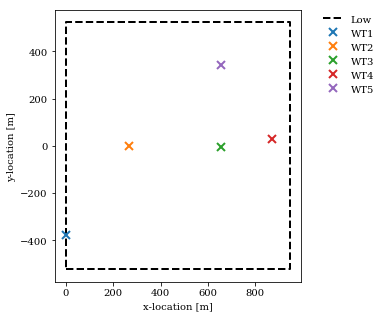

In [12]:
fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111,aspect="equal")

xmin = min(Case.x)
xmax = max(Case.x)+Case.D

ymin = -Case.Width/2
ymax = Case.Width/2

# low-res box
ax.plot([xmin,xmax,xmax,xmin,xmin],
        [ymin,ymin,ymax,ymax,ymin],'--k',lw=2,label='Low')

# high-res boxes
for wt in range(len(Case.x)):
    ax.plot(Case.x[wt],Case.y[wt],'x',ms=8,mew=2,label="WT{0}".format(wt+1))

plt.legend(bbox_to_anchor=(1.05,1.015),frameon=False)

ax.set_xlabel("x-location [m]")
ax.set_ylabel("y-location [m]")

fig.tight_layout
fig.savefig('TSLayout.pdf',bbox_to_inches='tight',dpi=500)